
<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Machine Learning
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        TP1: Supervised Learning
       </h2>
</center>

<div style="font-size:1.3em">
    <span>
    Réalisé par :¶
    </span>
      <ul>
         <li>ELGHABI Taha</li>
         <li>ELBATOURI Badr-eddine</li>
      </ul>
    <span>
    Encadré par :¶
    </span>
      <ul>
         <li>Pr. FISSAA TARIK</li>
      </ul>
</div>

<p style="font-size:2em">📜 Table of Content:</p><br>
<div style="font-size:1.5em">
    <ul>
       <li>
          <a href="#pre-processing">Prepare a dataset 📂</a>
       </li><br>
       <li>
          <a href="#model-building">Building models 🛠️</a>
       </li><br>
       <li>
          <a href="#Prediction">Fit the model and make a prediction ⚙️</a>
       </li><br>
       <li>
          <a href="#model-eval">Evaluate model predictions 📉</a>
       </li><br>
    </ul>
</div>

<h4 style="color:grey"> Importing Liberaries</h4>

In [1]:
# Setup Matplotlib to plot inline ( within the notebook ) 
%matplotlib inline
import matplotlib

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import numPy under the abbreviation 'np'
import numpy as np


In [2]:
#  ignore wornings
import warnings

warnings.filterwarnings("ignore")

We will start with heart-disease.csv, a “Dataset” containing anonymous data
about patients and whether or not they have heart disease

<div id="pre-processing">
        <h1 style="color:#1a1a1a">
         Prepare a dataset 📂
        </h1>
</div>

In [3]:
# Import the heart disease dataset an save it to a variable
# using pandas and read_csv()

heart_disease = pd.read_csv("heart-disease.csv")

# Check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Our goal here is to create a machine learning model on all columns at
exception of target to predict target.<br><br>
In essence, the target column is our target variable (also called y or label) and the
rest of the other columns are our independent variables (also called data or
X).<br><br>
Since our target variable is a category (heart disease or not), what is the type of ML problem we need to solve?<br><br>
Knowing that, let's create x and y by splitting a dataframe.

In [4]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

Now that we've split our data into x and y, we'll use Scikit-Learn to
divide them into training and testing sets.

In [5]:
# import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split x $ y into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

Since our data is now in training and test sets,
we will create a machine learning model to fit the models in the
training data and then make predictions on the test data.<br><br>
To determine which machine learning model we should use, you can
refer to ["Scikit-Learn's machine learning map"](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) .<br><br>
After following the map, you decide to use the RandomForestClassifier.

<div id="model-building">
        <h1 style="color:#1a1a1a">
         Building models 🛠️
        </h1>
</div>

In [7]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

Now that you have a RandomForestClassifier instance, let's fit it to the data
training.<br><br>
Once it is matched, we will make predictions on the test data.

<div id="Prediction">
        <h1 style="color:#1a1a1a">
         Fit the model and make a prediction ⚙️
        </h1>
</div>

In [8]:
# Fit the RandomForestClassifier to the training data

clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Use the fitted model to make predictions on the test data and 
# save the predictions to a variable called y_preds

y_preds = clf.predict(X_test)

<div id="model-eval">
        <h1 style="color:#1a1a1a">
         Evaluate model predictions 📉
        </h1>
</div>

Evaluating predictions is very important. Let's check how our model by calling the
score() method and passing it the training (X_train, y_train) and test data
(X_test, y_test).

In [10]:
# Evaluate the fitted model on the traning set using the score() function

clf.score(X_train, y_train)

1.0

In [11]:
# Evaluate the model on the test set

clf.score(X_test, y_test)

0.8421052631578947

 <h4 style="color:grey">How did the model perform?</h4>

The model has performed very well on the traning data and decent on the test data.

 <h4 style="color:grey">What metric does the score() function return for classifiers?</h4>

In the case of classifiers the score() function return the accuracy of the model on a specific data.

 <h4 style="color:grey">Did your model perform better with the training dataset or
the test data set?</h4>

Because It was trained on that data so it's more "optimized for it" as for test data it has never seen it.

Let's use the classification_report provided by sklearn

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



Let's print the confusion matrix and see to see our results

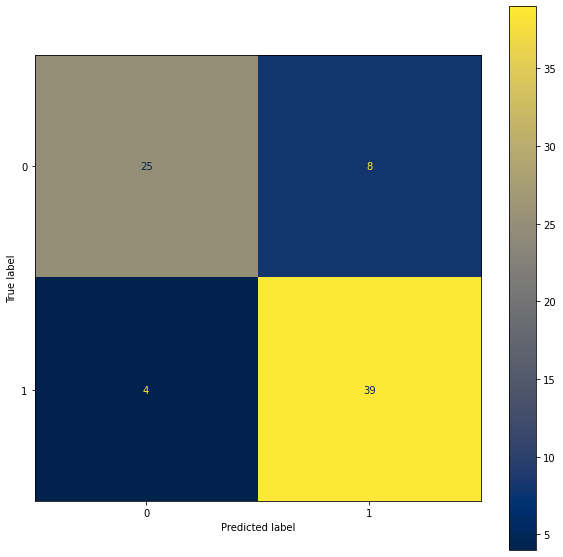

In [13]:
from sklearn.metrics import  ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, cmap='cividis')

In [14]:
from sklearn.metrics import  accuracy_score

accuracy_score(y_test, y_preds)

0.8421052631578947

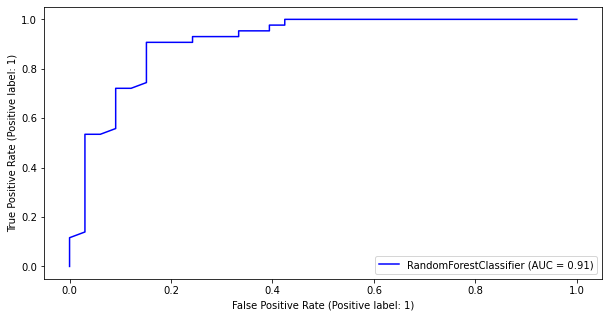

In [15]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fig, ax = plt.subplots(figsize=(10, 5))

disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, color="b")

 <h4 style="color:grey">Experiment with different classification models</h4>

We have now quickly covered the Scikit-Learn workflow from start to finish and since experimentation is a big part of machine learning, we will now try a series of different machine learning models and see which one performs the best on our dataset.<br><br>
Looking through the Scikit-Learn sheet, we see that there are a number of different classification models that we can try (different models are in the green boxes).<br><br>
For this exercise, the models we are going to try to compare are:<br><br>
• LinearSVC
• KNeighborsClassifier (K-Nearest Neighbors or KNN)
• SVC (support vector classifier, a form of support vector machine)
• LogisticRegression (despite the name, it's actually a classifier)
• RandomForestClassifier (a set method)
<br><br>
We will follow the same workflow we used above (except this time for several
models):<br><br>
1- Import a machine learning model
2- Prepare it
3- Fit it to the data and make predictions
4- Evaluate the fitted model
<br><br>
Note: Since we already have the data ready, we can reuse it in
this section.

In [16]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

Since the Scikit-Learn's API design is consistent, we can use
virtually the same code to adjust, evaluate and make predictions with each of our models.<br><br>
To see which model works best, we'll do the following:<br><br>
1- Instantiate each model in a dictionary
2- Create an empty result dictionary
3- Fit each model to the training data
4- Evaluate each model on the test data
5- Check the results
<br><br>
If you're wondering what it means to instantiate each pattern in a dictionary,
see the example below.

In [17]:
# EXAMPLE: Instantiating a RandomForestClassifier() in a dictionary
example_dict = {"RandomForestClassifier": RandomForestClassifier()}

# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

Since each model we're using has the same fit() and score() functions, we can loop through our models dictionary and, call fit() on the training data and then call score() with the test data

In [18]:
# EXAMPLE: Looping through example_dict fitting and scoring the model
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

# EXAMPLE: View the results
example_results  

{'RandomForestClassifier': 0.8289473684210527}

In [19]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

# View the results
results

{'LinearSVC': 0.75,
 'KNN': 0.6578947368421053,
 'SVC': 0.6447368421052632,
 'LogisticRegression': 0.8552631578947368,
 'RandomForestClassifier': 0.8289473684210527}

 <h4 style="color:grey">Which model performed the best?</h4>

The Logistic Regression has performed the best.

 <h4 style="color:grey">Do the results change each time you run the cell?</h4>

Yes the results change each time we run the cell.

 <h4 style="color:grey">If it changes, why do you think?</h4>

Due to the randomness of how each model finds patterns in the data, you might notice different results each time.

Let's use the classification_report provided by sklearn

<AxesSubplot:>

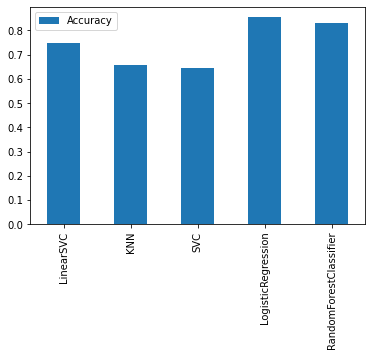

In [20]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar()

 <h4 style="color:grey">Hyperparameter Tuning</h4>

In [21]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
               "solver": ["liblinear"]}

In [22]:
# Setup np random seed of 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=False)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=False)

In [23]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [24]:
# Score the instance of RandomizedSearchCV using the test data

rs_log_reg.score(X_test, y_test)

0.868421052631579

 <h4 style="color:grey">Classifier model evaluation</h4>

In [25]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_train, y_train);

In [26]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

In [27]:
# Make predictions on test data and save them
y_preds = clf.predict(X_test)

In [28]:
# Create a confusion matrix using the confusion_matrix function

cf_matrix = confusion_matrix(y_test, y_preds)

<AxesSubplot:>

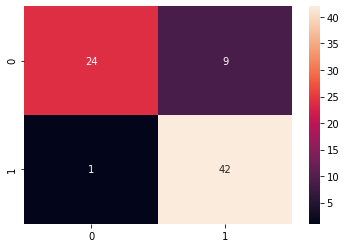

In [29]:
# Create a more visual confusion matrix
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [30]:
# Create a classification report using the classification_report function
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.96      0.73      0.83        33
           1       0.82      0.98      0.89        43

    accuracy                           0.87        76
   macro avg       0.89      0.85      0.86        76
weighted avg       0.88      0.87      0.86        76



In [31]:
2

2

**Challenge:** Write down what each of the columns in this classification report are.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

The classification report gives us a range of values for precision, recall and F1 score, time to find these metrics using Scikit-Learn functions.

In [32]:
# Find the precision score of the model using precision_score()
precision_score(y_test, y_preds)

0.8235294117647058

In [33]:
# Find the recall score
recall_score(y_test, y_preds)

0.9767441860465116

In [34]:
# Find the F1 score
f1_score(y_test, y_preds)

0.8936170212765957

Confusion matrix: done.
Classification report: done.
ROC (receiver operator characteristic) curve & AUC (area under curve) score: not done.

Let's fix this.

If you're unfamiliar with what a ROC curve, that's your first challenge, to read up on what one is.

In a sentence, a [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of the true positive rate versus the false positive rate.

And the AUC score is the area behind the ROC curve.

Scikit-Learn provides a handy function for creating both of these called [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

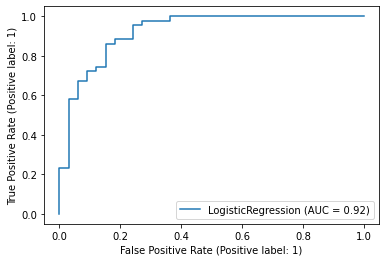

In [35]:
# Plot a ROC curve using our current machine learning model using plot_roc_curve
plot_roc_curve(clf, X_test, y_test);

Beautiful! We've gone far beyond accuracy with a plethora extra classification evaluation metrics.

If you're not sure about any of these, don't worry, they can take a while to understand. That could be an optional extension, reading up on a classification metric you're not sure of.

The thing to note here is all of these metrics have been calculated using a single training set and a single test set. Whilst this is okay, a more robust way is to calculate them using [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

We can calculate various evaluation metrics using cross-validation using Scikit-Learn's [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function along with the `scoring` parameter.

In [36]:
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score

In [37]:
# EXAMPLE: By default cross_val_score returns 5 values (cv=5).
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [38]:
# EXAMPLE: Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8479781420765027

In the examples, the cross-validated accuracy is found by taking the mean of the array returned by `cross_val_score()`.

Now it's time to find the same for precision, recall and F1 score.

In [39]:
# Find the cross-validated precision
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

0.8215873015873015

In [40]:
# Find the cross-validated recall
cross_val_recall = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

0.9272727272727274

In [41]:
# Find the cross-validated F1 score
cross_val_f1 = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

0.8705403543192143

### Exporting and importing a trained model

Once you've trained a model, you may want to export it and save it to file so you can share it or use it elsewhere.

One method of exporting and importing models is using the joblib library.

In Scikit-Learn, exporting and importing a trained model is known as [model persistence](https://scikit-learn.org/stable/modules/model_persistence.html).

In [42]:
# Import the dump and load functions from the joblib library
from joblib import dump, load

In [43]:
# Use the dump function to export the trained model to file
dump(clf, "trained-classifier.joblib")

['trained-classifier.joblib']

In [44]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
loaded_clf = load("trained-classifier.joblib")

# Evaluate the loaded trained model on the test data
loaded_clf.score(X_test, y_test)

0.868421052631579

What do you notice about the loaded trained model results versus the original (pre-exported) model results?


## Scikit-Learn Regression Practice

For the next few exercises, we're going to be working on a regression problem, in other words, using some data to predict a number.

Our dataset is a [table of car sales](https://docs.google.com/spreadsheets/d/1LPEIWJdSSJYrfn-P3UQDIXbEn5gg-o6I7ExLrWTTBWs/edit?usp=sharing), containing different car characteristics as well as a sale price.

We'll use Scikit-Learn's built-in regression machine learning models to try and learn the patterns in the car characteristics and their prices on a certain group of the dataset before trying to predict the sale price of a group of cars the model has never seen before.

To begin, we'll [import the data from GitHub](https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv) into a pandas DataFrame, check out some details about it and try to build a model as soon as possible.

In [45]:
# Read in the car sales data
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

# View the first 5 rows of the car sales data
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
# Get information about the car sales DataFrame
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


Looking at the output of `info()`,
* How many rows are there total?
* What datatypes are in each column?
* How many missing values are there in each column?

In [47]:
# Find number of missing values in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Find the datatypes of each column of car_sales
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

Knowing this information, what would happen if we tried to model our data as it is?

Let's see.

In [49]:
# EXAMPLE: This doesn't work because our car_sales data isn't all numerical
from sklearn.ensemble import RandomForestRegressor
car_sales_X, car_sales_y = car_sales.drop("Price", axis=1), car_sales.Price
rf_regressor = RandomForestRegressor().fit(car_sales_X, car_sales_y)

ValueError: could not convert string to float: 'Honda'

As we see, the cell above breaks because our data contains non-numerical values as well as missing data.

To take care of some of the missing data, we'll remove the rows which have no labels (all the rows with missing values in the `Price` column).

In [50]:
# Remove rows with no labels (NaN's in the Price column)
car_sales.dropna(subset=["Price"], inplace=True)

### Building a pipeline
Since our `car_sales` data has missing numerical values as well as the data isn't all numerical, we'll have to fix these things before we can fit a machine learning model on it.

There are ways we could do this with pandas but since we're practicing Scikit-Learn, we'll see how we might do it with the [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class. 

Because we're modifying columns in our dataframe (filling missing values, converting non-numerical data to numbers) we'll need the [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) and [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) classes as well.

Finally, because we'll need to split our data into training and test sets, we'll import `train_test_split` as well.

In [51]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

Now we've got the necessary tools we need to create our preprocessing `Pipeline` which fills missing values along with turning all non-numerical data into numbers.

Let's start with the categorical features.

In [52]:
# Define different categorical features 
categorical_features = ["Make", "Colour"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

It would be safe to treat `Doors` as a categorical feature as well, however since we know the vast majority of cars have 4 doors, we'll impute the missing `Doors` values as 4.

In [53]:
# Define Doors features
door_feature = ["Doors"]

# Create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

Now onto the numeric features. In this case, the only numeric feature is the `Odometer (KM)` column. Let's fill its missing values with the median.

In [54]:
# Define numeric features (only the Odometer (KM) column)
numeric_features = ["Odometer (KM)"]

# Crearte numeric transformer Pipeline
numeric_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median"
    ("imputer", SimpleImputer(strategy="median"))])

Time to put all of our individual transformer `Pipeline`'s into a single `ColumnTransformer` instance.

In [55]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_features),
        # Use the door_transformer to transform the door_feature
        ("door", door_transformer, door_feature),
        # Use the numeric_transformer to transform the numeric_features
        ("num", numeric_transformer, numeric_features)])

Boom! Now our `preprocessor` is ready, time to import some regression models to try out.

Comparing our data to the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see there's a handful of different regression models we can try.

* [RidgeRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [SVR(kernel="linear")](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - short for Support Vector Regressor, a form form of support vector machine.
* [SVR(kernel="rbf")](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - short for Support Vector Regressor, a form of support vector machine.
* [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) - the regression version of RandomForestClassifier.

In [56]:
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor

Again, thanks to the design of the Scikit-Learn library, we're able to use very similar code for each of these models.

To test them all, we'll create a dictionary of regression models and an empty dictionary for regression model results.

In [57]:
# Create dictionary of model instances, there should be 4 total key, value pairs
# in the form {"model_name": model_instance}.
# Don't forget there's two versions of SVR, one with a "linear" kernel and the
# other with kernel set to "rbf".
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

# Create an empty dictionary for the regression results
regression_results = {}

Our regression model dictionary is prepared as well as an empty dictionary to append results to, time to get the data split into `X` (feature variables) and `y` (target variable) as well as training and test sets.

In our car sales problem, we're trying to use the different characteristics of a car (`X`) to predict its sale price (`y`).

In [58]:
# Create car sales X data (every column of car_sales except Price)
car_sales_X = car_sales.drop("Price", axis=1)

# Create car sales y data (the Price column of car_sales)
car_sales_y = car_sales["Price"]

In [59]:
# Use train_test_split to split the car_sales_X and car_sales_y data into 
# training and test sets.
# Give the test set 20% of the data using the test_size parameter.
# For reproducibility set the random_state parameter to 42.
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)

# Check the shapes of the training and test datasets
car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((760, 4), (190, 4), (760,), (190,))

* How many rows are in each set?
* How many columns are in each set?

Alright, our data is split into training and test sets, time to build a small loop which is going to:
1. Go through our `regression_models` dictionary
2. Create a `Pipeline` which contains our `preprocessor` as well as one of the models in the dictionary
3. Fits the `Pipeline` to the car sales training data
4. Evaluates the target model on the car sales test data and appends the results to our `regression_results` dictionary

In [60]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    
    # Score the model pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, 
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


Our regression models have been fit, let's see how they did!

In [61]:
# Check the results of each regression model by printing the regression_results
# dictionary
regression_results

{'Ridge': 0.254026110579439,
 'SVR_linear': -0.489452821008145,
 'SVR_rbf': 0.0018546241516633755,
 'RandomForestRegressor': 0.2291358152962253}

* Which model did the best?
* How could you improve its results?
* What metric does the `score()` method of a regression model return by default?

Since we've fitted some models but only compared them via the default metric contained in the `score()` method (R^2 score or coefficient of determination), let's take the `RidgeRegression` model and evaluate it with a few other [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

Specifically, let's find:
1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Scikit-Learn has a few classes built-in which are going to help us with these, namely, [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) and [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [62]:
# Import mean_absolute_error from sklearn's metrics module
from sklearn.metrics import mean_absolute_error

# Import mean_squared_error from sklearn's metrics module
from sklearn.metrics import mean_squared_error

# Import r2_score from sklearn's metrics module
from sklearn.metrics import r2_score

All the evaluation metrics we're concerned with compare a model's predictions with the ground truth labels. Knowing this, we'll have to make some predictions.

Let's create a `Pipeline` with the `preprocessor` and a `Ridge()` model, fit it on the car sales training data and then make predictions on the car sales test data.

In [63]:
# Create RidgeRegression Pipeline with preprocessor as the "preprocessor" and
# Ridge() as the "model".
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the car sales training data
ridge_pipeline.fit(car_X_train, car_y_train)

# Make predictions on the car sales test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)

# View the first 50 predictions
car_y_preds[:50]

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

Nice! Now we've got some predictions, time to evaluate them. We'll find the mean squared error (MSE), mean absolute error (MAE) and R^2 score (coefficient of determination) of our model.

In [64]:
# EXAMPLE: Find the MSE by comparing the car sales test labels to the car sales predictions
mse = mean_squared_error(car_y_test, car_y_preds)
# Return the MSE
mse

49950182.63337458

In [65]:
# Find the MAE by comparing the car sales test labels to the car sales predictions
mae =  mean_absolute_error(car_y_test, car_y_preds)
# Return the MAE
mae

5713.8215208551555

In [66]:
# Find the R^2 score by comparing the car sales test labels to the car sales predictions
r2 = r2_score(car_y_test, car_y_preds)
# Return the R^2 score
r2

0.254026110579439

Our model could potentially do with some hyperparameter tuning (this would be a great extension). And we could probably do with finding some more data on our problem, 1000 rows doesn't seem to be sufficient.

* How would you export the trained regression model?